In [ ]:
# 3/6/01 - Restart on Drg to BOM,  Old ref : Untitled 32
# cd C:/Users/rohan/OneDrive/Desktop/jpg_drgs    # after opening power shell type this for serializing number of files
# ls | %{Rename-Item $_ -NewName ("beach-trip-2021-{0}.jpg" -f $nr++)}  # after executing above type this

In [1]:
import numpy as np
import math
import pandas as pd
import cv2
import os
from PIL import Image
import matplotlib.pyplot as plt

import easyocr
import pytesseract
from pytesseract import Output
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [2]:
# Making a list of image path
 
drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_1'
drg_image_1 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_1/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_2'
drg_image_2 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_2/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_3'
drg_image_3 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_3/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4'
drg_image_4 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_5'
drg_image_5 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_5/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6'
drg_image_6 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_7'
drg_image_7 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_7/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_8'
drg_image_8 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_8/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_9'
drg_image_9 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_9/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_directory = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_10'
drg_image_10 = ['C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_10/{}'.format(i) for i in os.listdir(drg_directory)] # making the list

drg_image = drg_image_1+drg_image_2+drg_image_3+drg_image_4+drg_image_5+drg_image_6+drg_image_7+drg_image_8+drg_image_9+drg_image_10
drg_image.sort() # Sorting the list

#num_images = len(drg_image_1) +len(drg_image_2) + len(drg_image_3) + len(drg_image_4)
num_images = len(drg_image)

print('Number of images = ', num_images)


Number of images =  410


In [39]:
drg_image[3].split('/')[-1]

'1004.jpg'

(2479, 3508)


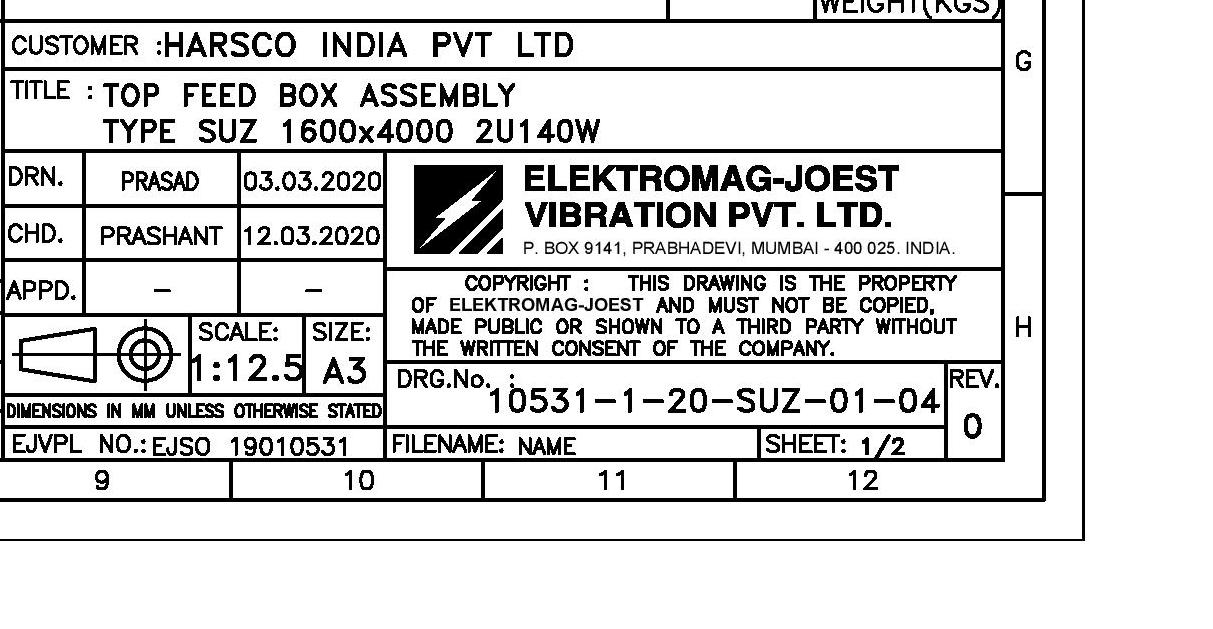

In [48]:
x = cv2.imread(drg_image[305], cv2.IMREAD_GRAYSCALE)
#print(x.shape)
dim = (3508, 2479)
  
# resize image
x_resized = cv2.resize(x, dim, interpolation = cv2.INTER_AREA)

x_pil = Image.fromarray(x_resized[1850:2479, 2295:3508])
#x_pil = Image.fromarray(x)
print(x_resized.shape)
display(x_pil)

(2479, 3508)


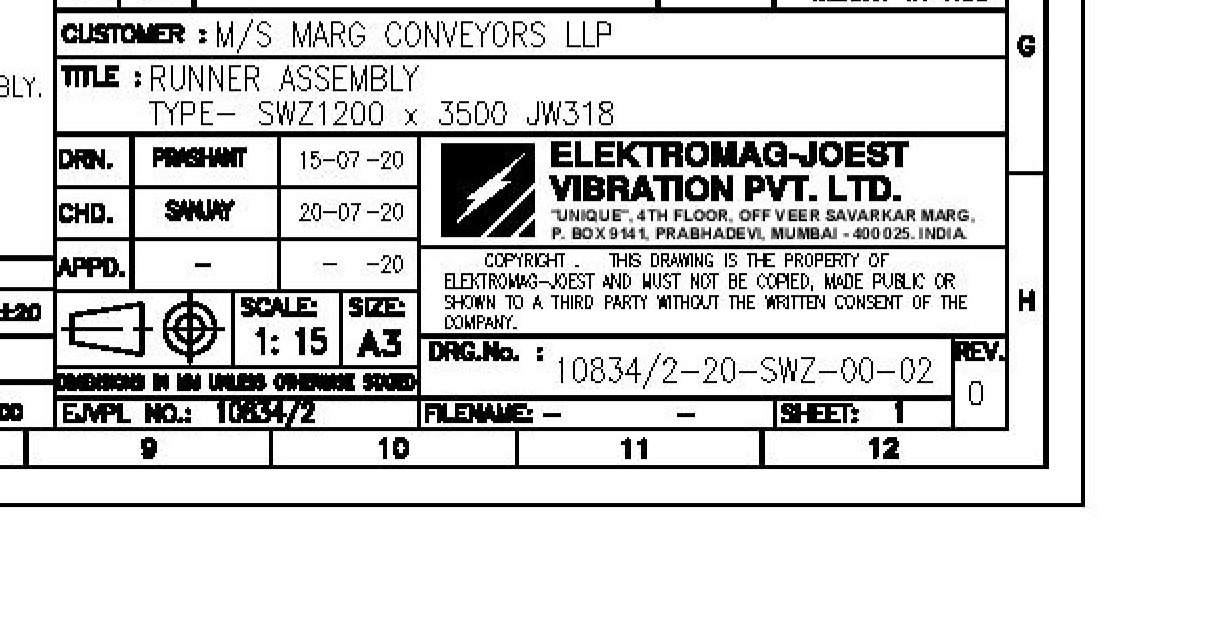

In [39]:

x = cv2.imread(drg_image[400], cv2.IMREAD_GRAYSCALE)
dim = (3508, 2479)
  
# resize image
x_resized = cv2.resize(x, dim, interpolation = cv2.INTER_AREA)

x_pil = Image.fromarray(x_resized[1850:2479, 2295:3508])
#x_pil = Image.fromarray(x_resized)
print(x_resized.shape)
display(x_pil)

In [4]:
# Loading output of VGG Image Annotation tool and create a dataframe

r_data = pd.DataFrame()

r_data_1 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_1.csv')
r_data_2 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_2.csv')
r_data_3 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_3.csv')
r_data_4 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_4.csv')
r_data_5 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_5.csv')
r_data_6 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_6.csv')
r_data_7 = pd.read_csv('C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/via_region_data_drg_test_7.csv')

r_data_1_master = r_data_1[~r_data_1['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_1_to_drop = r_data_1[r_data_1['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg
r_data_2_master = r_data_2[~r_data_2['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_2_to_drop = r_data_2[r_data_2['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg
r_data_3_master = r_data_3[~r_data_3['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_3_to_drop = r_data_3[r_data_3['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg
r_data_4_master = r_data_4[~r_data_4['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_4_to_drop = r_data_4[r_data_4['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg
r_data_5_master = r_data_5[~r_data_5['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_5_to_drop = r_data_5[r_data_5['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg
r_data_6_master = r_data_6[~r_data_6['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_6_to_drop = r_data_6[r_data_6['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg
r_data_7_master = r_data_7[~r_data_7['region_shape_attributes'].str.contains('{}')].reset_index(drop=True)
r_data_7_to_drop = r_data_7[r_data_7['region_shape_attributes'].str.contains('{}')].reset_index(drop=True) # to remove no region drg

image_drop_list_1 = r_data_1_to_drop['#filename'].tolist()
image_drop_list_2 = r_data_2_to_drop['#filename'].tolist()
image_drop_list_3 = r_data_3_to_drop['#filename'].tolist()
image_drop_list_4 = r_data_4_to_drop['#filename'].tolist()
image_drop_list_5 = r_data_5_to_drop['#filename'].tolist()
image_drop_list_6 = r_data_6_to_drop['#filename'].tolist()
image_drop_list_7 = r_data_7_to_drop['#filename'].tolist()

for i in image_drop_list_1:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_1/'+ i
    print('In drg_test_1 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list

for i in image_drop_list_2:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_2/'+ i
    print('In drg_test_2 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list

for i in image_drop_list_3:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_3/'+ i
    print('In drg_test_3 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list

for i in image_drop_list_4:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4/'+ i
    print('In drg_test_4 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list
    
for i in image_drop_list_5:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_5/'+ i
    print('In drg_test_5 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list
    
for i in image_drop_list_6:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6/'+ i
    print('In drg_test_6 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list
    
for i in image_drop_list_7:
    img_id = 'C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_7/'+ i
    print('In drg_test_7 = ', img_id)
    drg_image.remove(img_id) # remove the image from image list
    
drg_image.sort() # Sorting the list

r_data = pd.concat([r_data_1_master, r_data_2_master, r_data_3_master, r_data_4_master, r_data_5_master, r_data_6_master, r_data_7_master], axis = 0, ignore_index = True)

num_obj = r_data['region_count'][0] # number of objects in each photo
r_data.drop(r_data.columns[[1, 2, 3, 4]], axis=1, inplace=True) # reduce unnecessary columns

r_data.sort_values(by=['#filename'], ascending=True) # Sorting based on image-id
num_images = r_data["#filename"].nunique() # Find out number of unique images

print('Number of unique images = ', num_images)
print(len(r_data))
print(len(drg_image))

In drg_test_1 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_1/1023.jpg
In drg_test_2 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_2/1039.jpg
In drg_test_4 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4/1111.jpg
In drg_test_4 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4/1114.jpg
In drg_test_4 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_4/1141.jpg
In drg_test_5 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_5/1171.jpg
In drg_test_6 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6/0085-16-SWZ-00-00 R2-Model-page-001.jpg
In drg_test_6 =  C:/Users/rohan/OneDrive/Desktop/fresh_start_june_21/drg_test_6/0085-16-SWZ-04-02-Model-page-001.jpg
Number of unique images =  254
255
254


In [65]:
r_data.tail(3)

#filename  \
252     6391-15-SWZ-04-02-Model-page-001.jpg   
253  6472-16-FUF-01-01 R6-Model-page-001.jpg   
254     6971-16-SWD-04-01-Model-page-001.jpg   

                               region_shape_attributes region_attributes  
252  {"name":"rect","x":1553,"y":1501,"width":1726,...    {"text":"bom"}  
253  {"name":"rect","x":2271,"y":965,"width":1042,"...    {"text":"bom"}  
254  {"name":"rect","x":1492,"y":1367,"width":1786,...    {"text":"bom"}

In [5]:
# Check sizes of exiting images & Create a Dataframe with image id and height(row) and width(column):

rows = []
columns = []
image_sl = []
image_num = []
df_image = pd.DataFrame()

for i in range(len(drg_image)):
    image = cv2.imread(drg_image[i]) ## Loading image
    height, width, _ = image.shape
    rows.append(height)
    columns.append(width)
    image_sl.append(drg_image[i])
    image_num.append(drg_image[i].split('/')[-1])
        
row_values = pd.Series(rows)
col_values = pd.Series(columns)
image_path = pd.Series(image_sl)
image_id = pd.Series(image_num)

df_image.insert(loc=0, column='image_id', value=image_id)
df_image.insert(loc=1, column='image_path', value=image_path)
df_image.insert(loc=2, column='rows', value=row_values)
df_image.insert(loc=3, column='columns', value=col_values)

df_image.sort_values(by=['image_id'], ascending=True) # Sorting based on image-id

df_image.tail(5)

image_id  \
249     6391-15-SWZ-01-06-Model-page-001.jpg   
250     6391-15-SWZ-01-07-Model-page-001.jpg   
251     6391-15-SWZ-04-02-Model-page-001.jpg   
252  6472-16-FUF-01-01 R6-Model-page-001.jpg   
253     6971-16-SWD-04-01-Model-page-001.jpg   

                                            image_path  rows  columns  
249  C:/Users/rohan/OneDrive/Desktop/fresh_start_ju...  2479     3508  
250  C:/Users/rohan/OneDrive/Desktop/fresh_start_ju...  2479     3508  
251  C:/Users/rohan/OneDrive/Desktop/fresh_start_ju...  2479     3508  
252  C:/Users/rohan/OneDrive/Desktop/fresh_start_ju...  2479     3508  
253  C:/Users/rohan/OneDrive/Desktop/fresh_start_ju...  2479     3508

In [107]:
x = cv2.imread(drg_image[1], cv2.IMREAD_GRAYSCALE)
#x_pil = Image.fromarray(x[1425:1875, 2185:3300])
#print(x.shape)
#display(x_pil)

y = x[1425:1875, 2185:3300]
#z = cv2.GaussianBlur(y, (3, 3), 1)
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext(y)


CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [33]:
def unsharp_mask(image, kernel_size=(3, 3), sigma=1.0, amount=1.0, threshold=0):
    

    blurred = cv2.GaussianBlur(image, kernel_size, sigma)
    sharpened = float(amount + 1) * image - float(amount) * blurred
    sharpened = np.maximum(sharpened, np.zeros(sharpened.shape))
    sharpened = np.minimum(sharpened, 255 * np.ones(sharpened.shape))
    sharpened = sharpened.round().astype(np.uint8)
    if threshold > 0:
        low_contrast_mask = np.absolute(image - blurred) < threshold
        np.copyto(sharpened, image, where=low_contrast_mask)
    return sharpened

In [110]:
y_sharp = unsharp_mask(y)
result = reader.readtext(y_sharp)

In [111]:
result_pd = pd.DataFrame(result)
result_pd[0:20]

0  \
0             [[27, 9], [47, 9], [47, 35], [27, 35]]   
1         [[100, 8], [138, 8], [138, 38], [100, 38]]   
2         [[177, 5], [425, 5], [425, 41], [177, 41]]   
3         [[709, 6], [811, 6], [811, 39], [709, 39]]   
4         [[925, 7], [987, 7], [987, 43], [925, 43]]   
5   [[1034, 10], [1098, 10], [1098, 42], [1034, 42]]   
6           [[26, 54], [50, 54], [50, 82], [26, 82]]   
7         [[98, 54], [138, 54], [138, 86], [98, 86]]   
8       [[176, 54], [248, 54], [248, 86], [176, 86]]   
9       [[258, 54], [312, 54], [312, 86], [258, 86]]   
10      [[322, 54], [376, 54], [376, 86], [322, 86]]   
11      [[386, 54], [442, 54], [442, 86], [386, 86]]   
12      [[691, 51], [795, 51], [795, 87], [691, 87]]   
13      [[804, 54], [904, 54], [904, 86], [804, 86]]   
14      [[924, 56], [984, 56], [984, 88], [924, 88]]   
15  [[1034, 54], [1098, 54], [1098, 86], [1034, 86]]   
16      [[26, 100], [52, 100], [52, 130], [26, 130]]   
17    [[98, 102], [138, 102], [138, 132], [98, 132]]   
18    [[153, 99], [793, 99], [793, 135], [153, 135]]   
19    [[803, 99], [905, 99], [905, 135], [803, 135]]   

                                                  1         2  
0                                                 8  0.999995  
1                                                55  0.717629  
2                                   HARD WASHER A12  0.435183  
3                                           IS;6649  0.883767  
4                                              .008  0.943505  
5                                              0.44  0.999977  
6                                                 7  1.000000  
7                                                55  0.999998  
8                                              HSFG  0.996916  
9                                               HEX  0.987203  
10                                              NUT  0.998905  
11                                              M12  0.891186  
12                                          IS:6623  0.952069  
13                                          GR_8.81  0.521868  
14                                             0.01  0.999984  
15                                             0.55  0.999959  
16                                                6  0.999997  
17                                               55  0.977456  
18  KCOUNTERSUNK  SOCKET HEAD SCREW M10x35 |IS:6761  0.596236  
19                                         GR-8.81   0.288780

In [112]:

result_pd.tail(10)

0               1  \
67  [[1020, 334], [1096, 334], [1096, 366], [1020,...           219.9   
68       [[11, 381], [73, 381], [73, 417], [11, 417]]             IEM   
69     [[87, 381], [137, 381], [137, 417], [87, 417]]             No    
70   [[920, 378], [980, 378], [980, 410], [920, 410]]            UNIT   
71  [[1021, 377], [1099, 377], [1099, 413], [1021,...           TOTAL   
72       [[12, 410], [60, 410], [60, 442], [12, 442]]             No:   
73     [[86, 410], [138, 410], [138, 442], [86, 442]]             OFF   
74   [[297, 397], [461, 397], [461, 433], [297, 433]]     DESCRIPTION   
75   [[751, 397], [871, 397], [871, 433], [751, 433]]        MATERIAL   
76  [[903, 413], [1107, 413], [1107, 450], [903, 4...  WEICHT_IN Kgs:   

           2  
67  0.999958  
68  0.351134  
69  0.554444  
70  0.983602  
71  0.497438  
72  0.582567  
73  0.998918  
74  0.996801  
75  0.704702  
76  0.507147

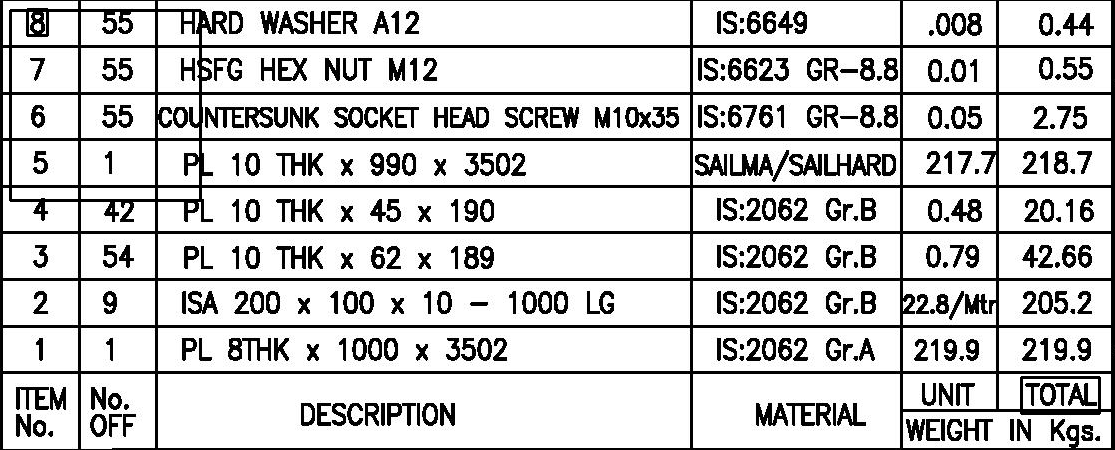

In [95]:
#cv2.rectangle(y, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
zzz = y
cv2.rectangle(zzz, (1021, 377), (1099, 413), (0, 0, 255), 2)
x_pil = Image.fromarray(zzz)
display(x_pil)

(2479, 3508)


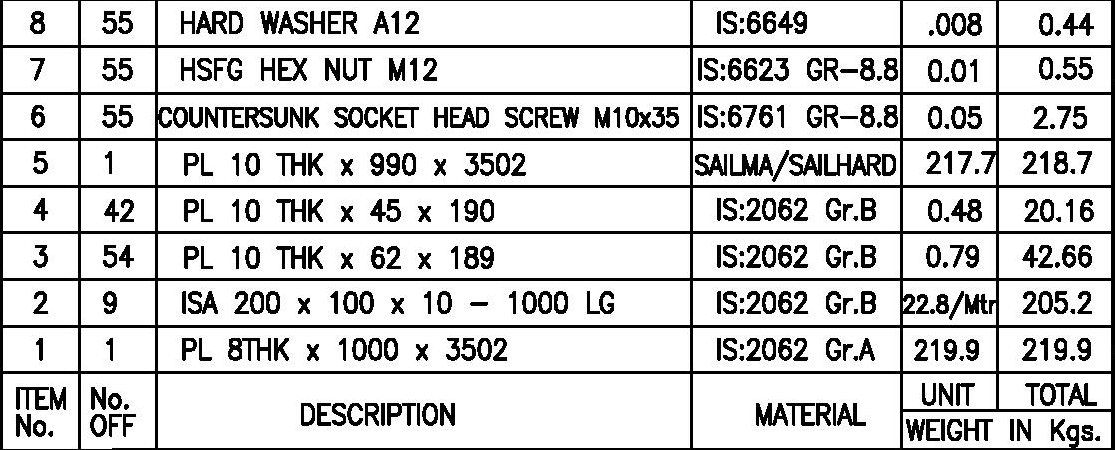

In [50]:
x = cv2.imread(drg_image[1], cv2.IMREAD_GRAYSCALE)
x_pil = Image.fromarray(y)
print(x.shape)
display(x_pil)


In [19]:
result

[([[27, 9], [47, 9], [47, 35], [27, 35]], '8', 0.9999890327754315),
 ([[100, 8], [138, 8], [138, 38], [100, 38]], '55', 0.8609000376104669),
 ([[177, 5], [425, 5], [425, 41], [177, 41]],
  'HARD WASHER A12',
  0.43918037503880497),
 ([[709, 6], [811, 6], [811, 39], [709, 39]], 'IS;6649', 0.9203966934574229),
 ([[925, 7], [987, 7], [987, 43], [925, 43]], '.008', 0.9303484559059143),
 ([[1034, 10], [1098, 10], [1098, 42], [1034, 42]],
  '0.44',
  0.9999796152114868),
 ([[27, 55], [47, 55], [47, 81], [27, 81]], '7', 0.999999046325911),
 ([[98, 54], [138, 54], [138, 86], [98, 86]], '55', 0.9999983141264758),
 ([[178, 54], [248, 54], [248, 86], [178, 86]], 'HSFG', 0.9959008693695068),
 ([[258, 54], [312, 54], [312, 86], [258, 86]], 'HEX', 0.4954720139503479),
 ([[322, 54], [376, 54], [376, 86], [322, 86]], 'NUT', 0.9989717488274735),
 ([[386, 54], [442, 54], [442, 86], [386, 86]], 'M12', 0.8600528858585283),
 ([[691, 54], [793, 54], [793, 86], [691, 86]], 'IS:6623', 0.6073700331310024),
 ([

In [28]:
result_pd = pd.DataFrame(result)

In [75]:
result_pd[70:81]

0                1  \
70   [[909, 333], [985, 333], [985, 369], [909, 369]]            219.9   
71  [[1020, 334], [1096, 334], [1096, 366], [1020,...            219.9   
72       [[12, 384], [72, 384], [72, 416], [12, 416]]              IEM   
73     [[87, 381], [137, 381], [137, 417], [87, 417]]               No   
74   [[920, 378], [978, 378], [978, 410], [920, 410]]             UNIT   
75  [[1021, 377], [1099, 377], [1099, 413], [1021,...             TOTA   
76       [[12, 410], [60, 410], [60, 442], [12, 442]]              No:   
77     [[86, 410], [138, 410], [138, 442], [86, 442]]              OFF   
78   [[297, 397], [461, 397], [461, 433], [297, 433]]      DESCRIPTION   
79   [[753, 397], [871, 397], [871, 433], [753, 433]]         MATERIAL   
80  [[903, 413], [1107, 413], [1107, 450], [903, 4...  WEICHT_IN_ Kgs:   

           2  
70  0.995258  
71  0.999961  
72  0.521172  
73  0.998053  
74  0.984417  
75  0.893900  
76  0.523627  
77  0.688343  
78  0.990407  
79  0.718925  
80  0.352995

In [55]:
image_data = pytesseract.image_to_string(y, output_type=Output.DICT)
#image_data_pd = pd.DataFrame(image_data)
image_data

{'text': ' \n\nHARD WASHER A12 IS:6649 .008\n\nCaP aSF6 HEC NUT Wi fs6605 oon [08s\n[6 [85 ouNTERSUNK SOCKET HEAD SCREW WiOs S761 GR-BA|_0.05 | 2.75 _\nPst | pL 10 Ti x 990 x 3502 ——_‘AL/SaLinro| 2177] 2187,\n\nP2 [9 [1st 200 x 100 x 10 - 700016 | 182062 orB pas/l 2052\nPate ari x 1000 x 3602 | isa062 cra [2108 | 2199,\n\nTOTAL\nNow | OFF DESCRIPTION MATERIAL WeiGHT IN Kgs,\n\n       \n\n \n\x0c'}

In [53]:
image_data_pd

char  left  bottom  right  top  page
0      ~     3     449   1111  450     0
1      H   181     416    195  439     0
2      A   196     416    227  439     0
3      R   212     416    229  439     0
4      D   229     416    243  439     0
..   ...   ...     ...    ...  ...   ...
279    ~     0      70   1115  409     0
280    ~   455      38    756   58     0
281    ~  1093      38   1115   58     0
282    ~  1093      58   1115   70     0
283    ~     3       0   1111    2     0

[284 rows x 6 columns]

In [49]:
image_data_pd_sorted =image_data_pd.sort_values(['top', 'left']).reset_index()
image_data_pd_sorted['text'] = image_data_pd_sorted['text'].map(lambda x: x if type(x)!=str else x.lower()) ## make Items in lower case

image_data_pd_sorted[0:50]

index  level  page_num  block_num  par_num  line_num  word_num  left  top  \
0       0      1         1          0        0         0         0     0    0   
1       1      2         1          1        0         0         0     3    0   
2       2      3         1          1        1         0         0     3    0   
3       3      4         1          1        1         1         0     3    0   
4       4      5         1          1        1         1         1     3    0   
5      16      5         1          3        1         1         1     0    7   
6      17      5         1          3        1         1         2   185    7   
7      18      5         1          3        1         1         3   260    7   
8      19      5         1          3        1         1         4   328    7   
9      20      5         1          3        1         1         5   387    7   
10     21      5         1          3        1         1         6   690    7   
11     22      5         1          3        1         1         7   866    7   
12     23      5         1          3        1         1         8   993    7   
13      5      2         1          2        0         0         0   181   11   
14      6      3         1          2        1         0         0   181   11   
15      7      4         1          2        1         1         0   181   11   
16      8      5         1          2        1         1         1   181   11   
17      9      5         1          2        1         1         2   260   11   
18     10      5         1          2        1         1         3   373   11   
19     11      5         1          2        1         1         4   717   11   
20     12      5         1          2        1         1         5   929   13   
21     94      2         1          6        0         0         0     0   41   
22     95      3         1          6        1         0         0     0   41   
23     96      4         1          6        1         1         0     0   41   
24     97      5         1          6        1         1         1     0   41   
25     13      2         1          3        0         0         0     3   48   
26     14      3         1          3        1         0         0     3   48   
27     15      4         1          3        1         1         0     3   48   
28     25      5         1          3        1         2         1     0   68   
29     26      5         1          3        1         2         2    64   68   
30     27      5         1          3        1         2         3   157   68   
31     28      5         1          3        1         2         4   336   68   
32     29      5         1          3        1         2         5   437   68   
33     30      5         1          3        1         2         6   508   68   
34     31      5         1          3        1         2         7   602   68   
35     32      5         1          3        1         2         8   698   68   
36     33      5         1          3        1         2         9   809   68   
37     34      5         1          3        1         2        10   996   68   
38     35      5         1          3        1         2        11  1024   68   
39     36      5         1          3        1         2        12  1096   68   
40     24      4         1          3        1         2         0     3   95   
41     38      5         1          3        1         3         1     0  115   
42     39      5         1          3        1         3         2   143  115   
43     40      5         1          3        1         3         3   186  115   
44     41      5         1          3        1         3         4   229  115   
45     42      5         1          3        1         3         5   279  115   
46     43      5         1          3        1         3         6   344  115   
47     44      5         1          3        1         3         7   372  115   
48     46      5         1         

In [56]:
contours, hierarchy = cv2.findContours(y, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [57]:
contours

[array([[[  0, 327]]], dtype=int32),
 array([[[  0, 287]],
 
        [[  0, 318]]], dtype=int32),
 array([[[  0, 278]]], dtype=int32),
 array([[[ 0, 47]]], dtype=int32),
 array([[[ 0,  7]],
 
        [[ 0, 38]]], dtype=int32),
 array([[[   0,    0]],
 
        [[   0,    1]],
 
        [[   1,    0]],
 
        [[   3,    2]],
 
        [[   2,    3]],
 
        [[   0,    3]],
 
        [[   1,    3]],
 
        [[   2,    4]],
 
        [[   1,    5]],
 
        [[   2,    5]],
 
        [[   3,    6]],
 
        [[   3,   39]],
 
        [[   2,   40]],
 
        [[   1,   40]],
 
        [[   2,   41]],
 
        [[   1,   42]],
 
        [[   0,   42]],
 
        [[   2,   42]],
 
        [[   3,   43]],
 
        [[   1,   45]],
 
        [[   0,   44]],
 
        [[   0,   45]],
 
        [[   1,   45]],
 
        [[   3,   47]],
 
        [[   1,   49]],
 
        [[   0,   49]],
 
        [[   0,   51]],
 
        [[   1,   52]],
 
        [[   2,   52]],
 
        [[   3,   5

In [60]:
contours, hierarchy = cv2.findContours(y, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

def sort_contours(cnts, method="left-to-right"):
    
# initialize the reverse flag and sort index
    reverse = False
    i = 0
# handle if we need to sort in reverse
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
# handle if we are sorting against the y-coordinate rather than
# the x-coordinate of the bounding box
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
# construct the list of bounding boxes and sort them from top to
# bottom
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
        key=lambda b:b[1][i], reverse=reverse))
# return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")


In [69]:
boundingBoxes[0:10]

((0, 0, 1115, 450),
 (995, 0, 5, 6),
 (899, 0, 5, 6),
 (691, 0, 3, 3),
 (155, 0, 3, 3),
 (77, 0, 5, 46),
 (690, 1, 4, 6),
 (154, 1, 5, 5),
 (154, 4, 4, 38),
 (995, 5, 4, 36))

In [68]:
y.shape

(450, 1115)

In [ ]:
# find no of columns and rows in a image table  python - search text
# https://stackoverflow.com/questions/27969091/processing-an-image-of-a-table-to-get-data-from-it
# https://stackoverflow.com/questions/60396925/detect-number-of-rows-and-columns-in-table-image-with-opencv
# Houghtransform

# Preferable interpolation methods are cv.INTER_AREA for shrinking and cv.INTER_CUBIC (slow) & cv.INTER_LINEAR for zooming. 
# By default, the interpolation method cv.INTER_LINEAR is used for all resizing purposes.

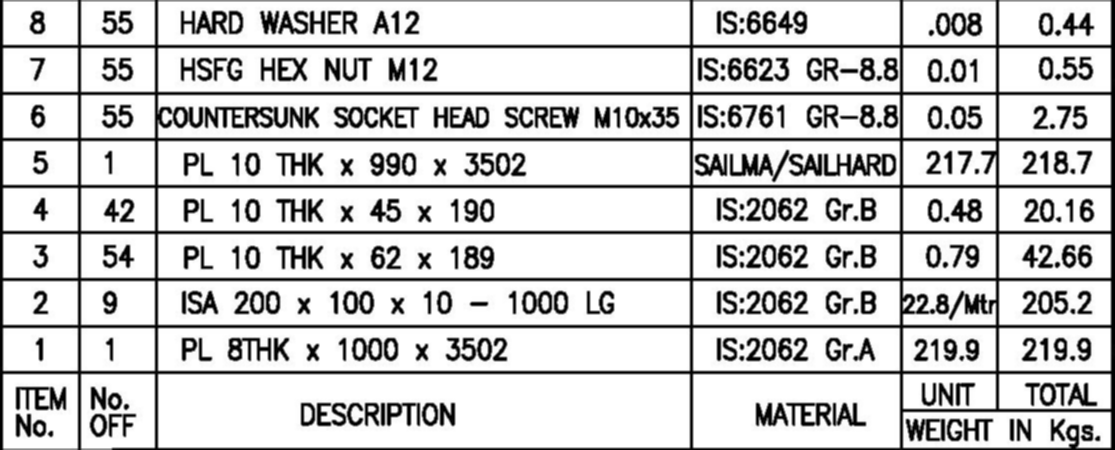

In [74]:
image = y
#edge_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#    edge_image = cv2.GaussianBlur(edge_image, (3, 3), 1)
edge_image = cv2.GaussianBlur(y, (3, 3), 1)
#edge_image = cv2.Canny(edge_image, 100, 200)
#edge_image = cv2.Canny(y, 100, 200)

x_pil = Image.fromarray(edge_image)

display(x_pil)


(2479, 3508, 3)
(460, 1125, 3)


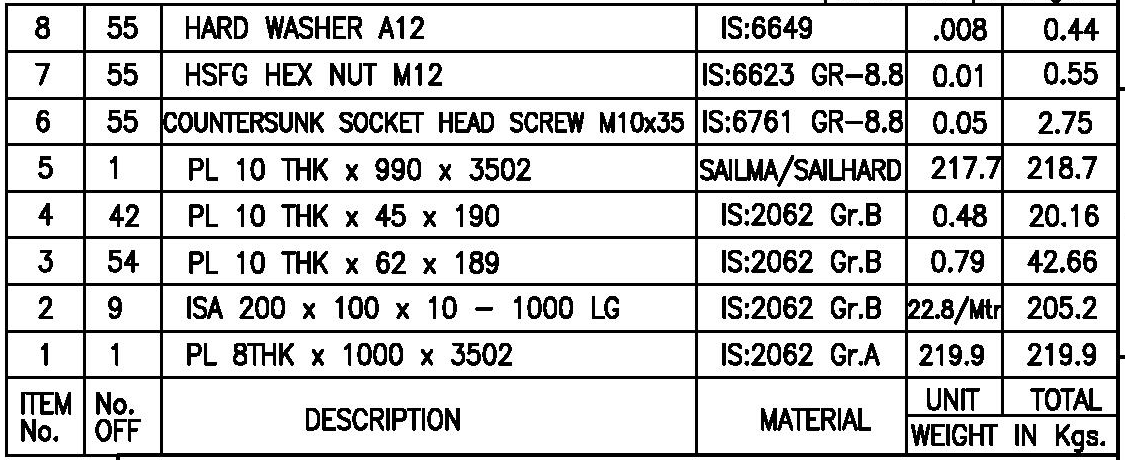

In [43]:
x = cv2.imread(drg_image[1])
y = x[1420:1880, 2180:3305]
y_pil = Image.fromarray(y)
print(x.shape)
print(y.shape)
display(y_pil)

In [6]:


y = x[1425:1875, 2185:3300]
#z = cv2.GaussianBlur(y, (3, 3), 1)
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext(y)

result_pd = pd.DataFrame(result)
result_pd

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


0                1  \
0              [[27, 9], [47, 9], [47, 35], [27, 35]]                8   
1          [[100, 8], [138, 8], [138, 38], [100, 38]]               55   
2          [[177, 5], [425, 5], [425, 41], [177, 41]]  HARD WASHER A12   
3          [[709, 6], [811, 6], [811, 39], [709, 39]]          IS;6649   
4          [[925, 7], [987, 7], [987, 43], [925, 43]]             .008   
..                                                ...              ...   
76       [[12, 410], [60, 410], [60, 442], [12, 442]]              No:   
77     [[86, 410], [138, 410], [138, 442], [86, 442]]              OFF   
78   [[297, 397], [461, 397], [461, 433], [297, 433]]      DESCRIPTION   
79   [[753, 397], [871, 397], [871, 433], [753, 433]]         MATERIAL   
80  [[903, 413], [1107, 413], [1107, 450], [903, 4...  WEICHT_IN_ Kgs:   

           2  
0   0.999989  
1   0.860900  
2   0.439180  
3   0.920397  
4   0.930348  
..       ...  
76  0.523627  
77  0.688343  
78  0.990407  
79  0.718925  
80  0.352995  

[81 rows x 3 columns]

In [8]:
result_pd.tail(10)

0                1  \
71  [[1020, 334], [1096, 334], [1096, 366], [1020,...            219.9   
72       [[12, 384], [72, 384], [72, 416], [12, 416]]              IEM   
73     [[87, 381], [137, 381], [137, 417], [87, 417]]               No   
74   [[920, 378], [978, 378], [978, 410], [920, 410]]             UNIT   
75  [[1021, 377], [1099, 377], [1099, 413], [1021,...             TOTA   
76       [[12, 410], [60, 410], [60, 442], [12, 442]]              No:   
77     [[86, 410], [138, 410], [138, 442], [86, 442]]              OFF   
78   [[297, 397], [461, 397], [461, 433], [297, 433]]      DESCRIPTION   
79   [[753, 397], [871, 397], [871, 433], [753, 433]]         MATERIAL   
80  [[903, 413], [1107, 413], [1107, 450], [903, 4...  WEICHT_IN_ Kgs:   

           2  
71  0.999961  
72  0.521172  
73  0.998053  
74  0.984417  
75  0.893900  
76  0.523627  
77  0.688343  
78  0.990407  
79  0.718925  
80  0.352995

In [10]:
y_sharp = unsharp_mask(y)
result_sharp = reader.readtext(y_sharp)
result_pd_sharp = pd.DataFrame(result_sharp)
result_pd.tail(9)

NameError: name 'resumt_pd' is not defined

In [12]:

result_pd_sharp.tail(9)

0               1  \
68       [[11, 381], [73, 381], [73, 417], [11, 417]]             IEM   
69     [[87, 381], [137, 381], [137, 417], [87, 417]]             No    
70   [[920, 378], [980, 378], [980, 410], [920, 410]]            UNIT   
71  [[1021, 377], [1099, 377], [1099, 413], [1021,...           TOTAL   
72       [[12, 410], [60, 410], [60, 442], [12, 442]]             No:   
73     [[86, 410], [138, 410], [138, 442], [86, 442]]             OFF   
74   [[297, 397], [461, 397], [461, 433], [297, 433]]     DESCRIPTION   
75   [[751, 397], [871, 397], [871, 433], [751, 433]]        MATERIAL   
76  [[903, 413], [1107, 413], [1107, 450], [903, 4...  WEICHT_IN Kgs:   

           2  
68  0.351134  
69  0.554444  
70  0.983602  
71  0.497438  
72  0.582567  
73  0.998918  
74  0.996801  
75  0.704702  
76  0.507147

In [14]:
z = cv2.GaussianBlur(y, (3, 3), 1)
result_sharp_1 = reader.readtext(z)
result_pd_sharp_1 = pd.DataFrame(result_sharp_1)
result_pd_sharp_1.tail(9)

0               1  \
55       [[12, 384], [72, 384], [72, 416], [12, 416]]             MEM   
56     [[85, 381], [137, 381], [137, 417], [85, 417]]              No   
57   [[917, 377], [981, 377], [981, 413], [917, 413]]             UNT   
58  [[1021, 377], [1101, 377], [1101, 413], [1021,...            TOIA   
59       [[11, 409], [61, 409], [61, 445], [11, 445]]             No:   
60     [[86, 410], [140, 410], [140, 442], [86, 442]]             OFF   
61   [[295, 397], [463, 397], [463, 433], [295, 433]]     DESCRIPTION   
62   [[752, 400], [870, 400], [870, 432], [752, 432]]        MATERIAL   
63  [[901, 413], [1107, 413], [1107, 450], [901, 4...  WEIGHT_IN Kgs:   

           2  
55  0.731124  
56  0.990165  
57  0.652705  
58  0.615568  
59  0.754484  
60  0.999041  
61  0.747569  
62  0.987887  
63  0.263308

In [17]:
result_pd_sharp.head(20)

0  \
0             [[27, 9], [47, 9], [47, 35], [27, 35]]   
1         [[100, 8], [138, 8], [138, 38], [100, 38]]   
2         [[177, 5], [425, 5], [425, 41], [177, 41]]   
3         [[709, 6], [811, 6], [811, 39], [709, 39]]   
4         [[925, 7], [987, 7], [987, 43], [925, 43]]   
5   [[1034, 10], [1098, 10], [1098, 42], [1034, 42]]   
6           [[26, 54], [50, 54], [50, 82], [26, 82]]   
7         [[98, 54], [138, 54], [138, 86], [98, 86]]   
8       [[176, 54], [248, 54], [248, 86], [176, 86]]   
9       [[258, 54], [312, 54], [312, 86], [258, 86]]   
10      [[322, 54], [376, 54], [376, 86], [322, 86]]   
11      [[386, 54], [442, 54], [442, 86], [386, 86]]   
12      [[691, 51], [795, 51], [795, 87], [691, 87]]   
13      [[804, 54], [904, 54], [904, 86], [804, 86]]   
14      [[924, 56], [984, 56], [984, 88], [924, 88]]   
15  [[1034, 54], [1098, 54], [1098, 86], [1034, 86]]   
16      [[26, 100], [52, 100], [52, 130], [26, 130]]   
17    [[98, 102], [138, 102], [138, 132], [98, 132]]   
18    [[153, 99], [793, 99], [793, 135], [153, 135]]   
19    [[803, 99], [905, 99], [905, 135], [803, 135]]   

                                                  1         2  
0                                                 8  0.999995  
1                                                55  0.717629  
2                                   HARD WASHER A12  0.435183  
3                                           IS;6649  0.883767  
4                                              .008  0.943505  
5                                              0.44  0.999977  
6                                                 7  1.000000  
7                                                55  0.999998  
8                                              HSFG  0.996916  
9                                               HEX  0.987203  
10                                              NUT  0.998905  
11                                              M12  0.891186  
12                                          IS:6623  0.952069  
13                                          GR_8.81  0.521868  
14                                             0.01  0.999984  
15                                             0.55  0.999959  
16                                                6  0.999997  
17                                               55  0.977456  
18  KCOUNTERSUNK  SOCKET HEAD SCREW M10x35 |IS:6761  0.596236  
19                                         GR-8.81   0.288780

In [3]:
x = cv2.imread(drg_image[1])
x_1 = x[1425:1875, 2185:3300]
y = cv2.imread(drg_image[1], cv2.IMREAD_GRAYSCALE)
y_1 = y[1425:1875, 2185:3300]
print('color shape = ', x_1.shape)
print('grey shape = ', y_1.shape)
print('color pixels = ', x_1[100,100])
print('grey pixels = ', y_1[100,100])
print('color pixel numbers = ', x_1.size)
print('grey pixel numbers = ', y_1.size)


color shape =  (450, 1115, 3)
grey shape =  (450, 1115)
color pixels =  [255 255 255]
grey pixels =  255
color pixel numbers =  1505250
grey pixel numbers =  501750


In [6]:
print('color pixels = ', x_1[40:50,40:50])
print('grey pixels = ', y_1[40:50,40:50])

color pixels =  [[[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]
  [253 253 253]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]
  [252 252 252]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  1   1  

In [20]:
x_pil = Image.fromarray(y_1[45:48,40:90])
display(x_pil)

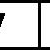

In [25]:
x_pil = Image.fromarray(y_1[45:95,40:90])
display(x_pil)

In [115]:
yy = y_1[85:100,73:86]
x_pil = Image.fromarray(yy)
display(x_pil)

In [116]:
yy = y_1[85:100,73:86]
yy

array([[255, 255, 253, 255, 252,   1,   1,   0, 255, 255, 251, 255, 253],
       [255, 255, 253, 255, 252,   1,   1,   0, 255, 255, 251, 255, 253],
       [254, 251, 255, 255, 250,   0,   0,   0, 255, 251, 253, 255, 255],
       [255, 255, 250, 245, 249,  12,   2,   0, 255, 251, 255, 255, 248],
       [242, 254, 255, 255, 255,   0,   4,   0, 255, 255, 255, 255, 255],
       [255, 255, 246, 255, 255,  12,   0,   0, 255, 250, 250, 246, 254],
       [248, 255, 255, 255, 219,   9,   5,  19, 244, 255, 255, 255, 253],
       [  0,   0,   0,   0,  29,   0,   6,   0,  26,   0,   0,   0,   9],
       [  1,  12,  11,   2,   0,   0,   8,   0,   2,   0,   4,   4,   4],
       [ 10,   0,   0,   7,   0,  14,   0,  12,   0,   3,   0,   0,   0],
       [255, 255, 253, 255, 252,   1,   1,   0, 255, 255, 251, 255, 253],
       [255, 255, 253, 255, 252,   1,   1,   0, 255, 255, 251, 255, 253],
       [255, 255, 253, 255, 252,   1,   1,   0, 255, 255, 251, 255, 253],
       [255, 255, 253, 255, 252,   1, 

In [117]:
ret,thresh_2 = cv2.threshold(yy,50,255,cv2.THRESH_BINARY_INV)
yyy = thresh_2
x_pil = Image.fromarray(yyy)
display(x_pil)

In [127]:
kernel = np.ones((3,3),np.uint8)
yyyy = cv2.erode(yyy,kernel,iterations = 1)
x_pil = Image.fromarray(yyyy)
display(x_pil)

In [125]:
yyyy

array([[  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 255,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 

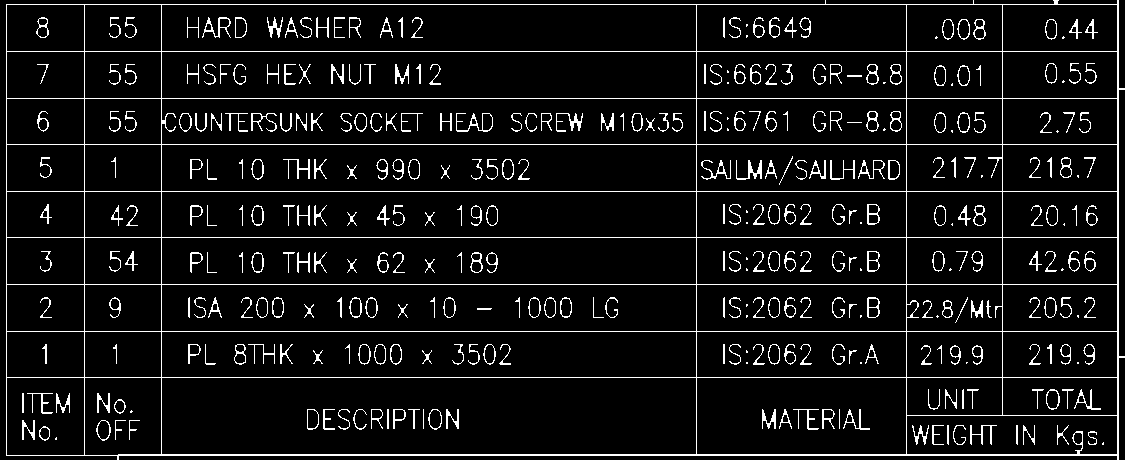

In [3]:



x = cv2.imread(drg_image[1], cv2.IMREAD_GRAYSCALE)
y = x[1420:1880, 2180:3305]
yy = y[85:100,73:86]
x_pil = Image.fromarray(yy)
display(x_pil)

ret,thresh_3 = cv2.threshold(y,50,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((3,3),np.uint8)
y_erosion = cv2.erode(thresh_3,kernel,iterations = 1)
x_pil = Image.fromarray(y_erosion)
display(x_pil)



In [58]:
print(y_erosion.shape)
print(type(y_erosion))
pd_y = pd.DataFrame()
pd_y = pd.DataFrame(y_erosion)  # creating a dataframe with y_erosion pixel values which are either 0(black) or 255(white)

# count how many '0's and '255's are there row-wise & keep in a df
pd_int_1 = pd_y.apply(pd.Series.value_counts, axis=1).fillna(0) 

# count how many '0's and '255's are there col-wise & keep in a df after discarding row with '0' counts i.e.[1:]
pd_int_2 = pd_y.apply(pd.Series.value_counts, axis=0)[1:].fillna(0).astype(int)

# insert a col with 'o' value at the front for matching with the col numbers when pd_int_1 is added to pd_y
pd_int_2.insert(loc=0, column='v_255', value=0)

pd_y.insert(loc=0, column='v_255', value=pd.Series(pd_int_1[255])) # only '255'-counts in pd_int_1 is added to pd_y
y_pd = pd.concat([pd_int_2, pd_y], ignore_index=True)              # pd_int_2 is added to pd_y
y_pd.columns = range(0, (y_erosion.shape[1]+1), 1)                                   # reindex the columns

y_pd


(460, 1125)
<class 'numpy.ndarray'>


0     1     2     3     4     5     6     7     8     9     ...  1116  \
0       0     0     0     0     0     0     0   452    10    10  ...    12   
1      10     0     0     0     0     0     0     0     0     0  ...     0   
2       8     0     0     0     0     0     0     0     0     0  ...     0   
3       8     0     0     0     0     0     0     0     0     0  ...     0   
4       8     0     0     0     0     0     0     0     0     0  ...     0   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
456  1113     0     0     0     0     0     0   255   255   255  ...   255   
457     4     0     0     0     0     0     0     0     0     0  ...     0   
458     4     0     0     0     0     0     0     0     0     0  ...     0   
459     4     0     0     0     0     0     0     0     0     0  ...     0   
460     4     0     0     0     0     0     0     0     0     0  ...     0   

     1117  1118  1119  1120  1121  1122  1123  1124  1125  
0      12   460   460     4     4     4     4     4     4  
1       0   255   255     0     0     0     0     0     0  
2       0   255   255     0     0     0     0     0     0  
3       0   255   255     0     0     0     0     0     0  
4       0   255   255     0     0     0     0     0     0  
..    ...   ...   ...   ...   ...   ...   ...   ...   ...  
456   255   255   255     0     0     0     0     0     0  
457     0   255   255     0     0     0     0     0     0  
458     0   255   255     0     0     0     0     0     0  
459     0   255   255     0     0     0     0     0     0  
460     0   255   255     0     0     0     0     0     0  

[461 rows x 1126 columns]

In [59]:
# Find our hor and vertical line indexes of the bom table

limit_col = int(y_erosion.shape[1]*0.90)
limit_row = int(y_erosion.shape[0]*0.90)

next_y_pd_row = pd.DataFrame()
next_y_pd_row = y_pd
next_y_pd_col = pd.DataFrame()
next_y_pd_col = y_pd
row_index_list = []
col_index_list = []
row_idx_prev = 0
col_idx_prev = 0
   
for i in range(100):                                        # assuming bom items within 100 in one drawing
    
    row_idx = (next_y_pd_row[0].values > limit_col).argmax()
    col_idx = (next_y_pd_col[0:1].values > limit_row).argmax()
    
    if row_idx > 0:
        row_idx = row_idx + row_idx_prev
        row_index_list.append(row_idx)
        next_y_pd_row = y_pd[row_idx+1::]
        row_idx_prev = row_idx + 1

    elif col_idx > 0:
        col_idx = col_idx + col_idx_prev
        col_index_list.append(col_idx)
        next_y_pd_col = y_pd.loc[:, col_idx+1::]
        col_idx_prev = col_idx + 1
        
    else:
        i = 99

print(row_index_list)
print(col_index_list)

minm_row_height = min([t - s for s, t in zip(row_index_list, row_index_list[1:])])
minm_col_width = min([t - s for s, t in zip(col_index_list, col_index_list[1:])])

print('minimim row height = ', minm_row_height)
print('minimim col width = ', minm_col_width)

[5, 52, 99, 145, 192, 238, 285, 332, 378, 456]
[7, 85, 162, 697, 907, 1118]
minimim row height =  46
minimim col width =  77


In [60]:
# find out diagonally opposite corner cordinates of all the boxes (other than sub-boxes) within the table :

num_row = len(row_index_list) - 1
num_col = len(col_index_list) - 1
top_cor_index = []
bot_cor_index = []
all_cor_index = []

for i in row_index_list[0:num_row]:
    
    for j in col_index_list[0:num_col]:
            
            co_ordinate = []
            co_ordinate = [i, j]
            top_cor_index.append(co_ordinate)

for i in row_index_list[1:num_row+1]:
    
    for j in col_index_list[1:num_col+1]:
            
            co_ordinate = []
            co_ordinate = [i, j]
            bot_cor_index.append(co_ordinate)

all_cor_index = [[i] + [j] for i, j in zip(top_cor_index, bot_cor_index)]

print('no. of boxes in bom = ', len(all_cor_index))
print('co-ordinate of 1st box = ', all_cor_index[0])

no. of boxes in bom =  45
co-ordinate of 1st box =  [[5, 7], [52, 85]]


In [61]:
# 1) find whether sub-boxes exists within boxes

new_box_list = []
to_pop_index = []

for i in range(len(all_cor_index)):
    
    id_1, id_2 = all_cor_index[i][0][0], all_cor_index[i][1][0]
    id_3, id_4 = all_cor_index[i][0][1], all_cor_index[i][1][1]
    
    box_pd = pd.DataFrame()

    box_image = y_erosion[(id_1-1):(id_2-1), (id_3-1):(id_4-1)]  # note the indexes. Since y_erosion shape is 1 less than y_pd
                                                                # row and col indexes reduced by 1 
#x = box_image
#x_pil = Image.fromarray(x)
#display(x_pil)

    box_pd = y_pd.iloc[id_1+2:id_2-2, id_3+2:id_4-2]             # note the indexes. indexes reduced by 2 pixels to remove any
                                                          # boundary lines if at all exis
# box_pd

    # 2) check whether hor line exists in the above box :

    box_pd_hor = pd.DataFrame()
    box_pd_ver = pd.DataFrame()

    hor_line_idx = 0
    hor_line_len = 0
    ver_line_idx = 0
    ver_line_len = 0

    pd_0 = box_pd.eq(0)
    pd_255 = box_pd.eq(255)

    box_pd_hor['255_hor'] = pd_0.cumsum(axis=1)[pd_255].apply(pd.value_counts, axis=1).max(axis=1)
    #box_pd['Zeros'] = pd_255.cumsum(axis=1)[pd_0].apply(pd.value_counts, axis=1).max(axis=1)

    max_255_hor = box_pd_hor[['255_hor']].idxmax()
    if int(box_pd_hor['255_hor'][max_255_hor].tolist()[0]) >= minm_col_width-10 :
    
        hor_line_idx = max_255_hor.tolist()[0]
        hor_line_len = int(box_pd_hor['255_hor'][max_255_hor].tolist()[0])
    
    # print('hor line index within box = ', hor_line_idx)

    # 3) check whether vertical line exists in the above box :

    box_pd_ver = pd_0.cumsum(axis=0)[pd_255].apply(pd.value_counts, axis=0).max(axis=0)
    max_255_ver = box_pd_ver.idxmax()
    if int(box_pd_ver[max_255_ver]) >= minm_row_height-10 :
    
        ver_line_idx = max_255_ver
        ver_line_len = int(box_pd_ver[max_255_ver])
    
    # print('ver line index within box = ', ver_line_idx)
    
    # 4) find sub-box co-ordinates :

    parent_box_wd = (all_cor_index[i][1][1] - all_cor_index[i][0][1])
    parent_box_ht = (all_cor_index[i][1][0] - all_cor_index[i][0][0])

    if hor_line_len == parent_box_wd-4 :
        if ver_line_len <= parent_box_ht-4 :
            new_boxes_cors_1 = [all_cor_index[i][0], [hor_line_idx,ver_line_idx]]
            new_box_list.append(new_boxes_cors_1)
            new_boxes_cors_2 = [[all_cor_index[i][0][0],ver_line_idx], [hor_line_idx,all_cor_index[i][1][1]]]
            new_box_list.append(new_boxes_cors_2)
            new_boxes_cors_3 = [[hor_line_idx,all_cor_index[i][0][1]], all_cor_index[i][1]]
            new_box_list.append(new_boxes_cors_3)
            to_pop_index.append(i)
    else:
        if ver_line_len == parent_box_ht-4 :
            new_boxes_cors_1 = [all_cor_index[i][0], [all_cor_index[i][1][0], ver_line_idx]]
            new_box_list.append(new_boxes_cors_1)
            new_boxes_cors_2 = [[all_cor_index[i][0][0], ver_line_idx], all_cor_index[i][1]]
            new_box_list.append(new_boxes_cors_2)
            to_pop_index.append(i)


for index in sorted(to_pop_index, reverse=True):
    del all_cor_index[index]

final_cor_index = all_cor_index + new_box_list
print(len(final_cor_index))

55


In [63]:
print(final_cor_index)

[[[5, 7], [52, 85]], [[5, 85], [52, 162]], [[5, 162], [52, 697]], [[5, 697], [52, 907]], [[52, 7], [99, 85]], [[52, 85], [99, 162]], [[52, 162], [99, 697]], [[52, 697], [99, 907]], [[99, 7], [145, 85]], [[99, 85], [145, 162]], [[99, 162], [145, 697]], [[99, 697], [145, 907]], [[145, 7], [192, 85]], [[145, 85], [192, 162]], [[145, 162], [192, 697]], [[145, 697], [192, 907]], [[192, 7], [238, 85]], [[192, 85], [238, 162]], [[192, 162], [238, 697]], [[192, 697], [238, 907]], [[238, 7], [285, 85]], [[238, 85], [285, 162]], [[238, 162], [285, 697]], [[238, 697], [285, 907]], [[285, 7], [332, 85]], [[285, 85], [332, 162]], [[285, 162], [332, 697]], [[285, 697], [332, 907]], [[332, 7], [378, 85]], [[332, 85], [378, 162]], [[332, 162], [378, 697]], [[332, 697], [378, 907]], [[378, 7], [456, 85]], [[378, 85], [456, 162]], [[378, 162], [456, 697]], [[378, 697], [456, 907]], [[5, 907], [52, 1003]], [[5, 1003], [52, 1118]], [[52, 907], [99, 1003]], [[52, 1003], [99, 1118]], [[99, 907], [145, 1003]

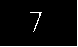

In [78]:
yyy = y_erosion[52:99, 7:85]
x_pil = Image.fromarray(yyy)
display(x_pil)


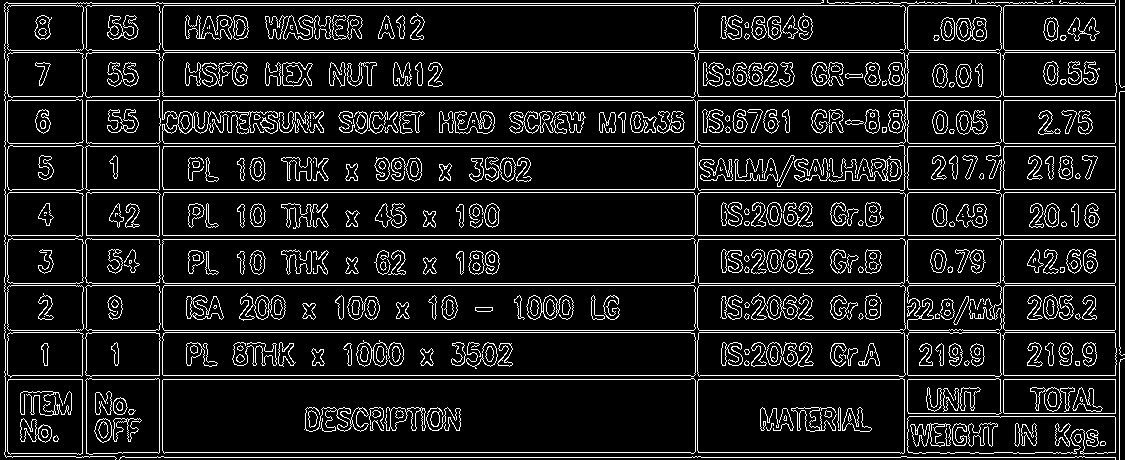

In [64]:
y_eros = cv2.Canny(y, 50, 250, None, 3)
x_pil = Image.fromarray(y_eros)
display(x_pil)

In [65]:
y.shape

(460, 1125)

(38, 1, 4)


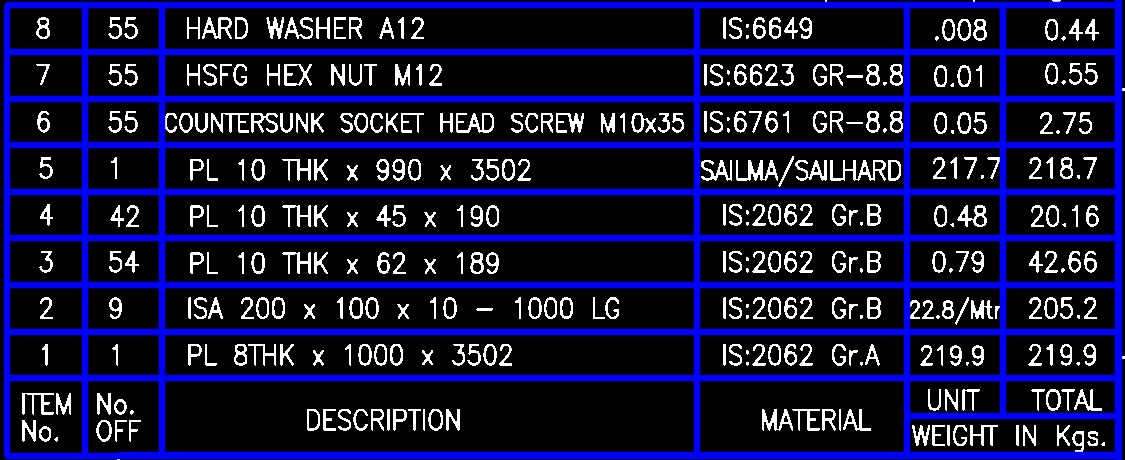

In [133]:

# Copy edges to the images that will display the results in BGR

cdstP_new = cv2.cvtColor(y_erosion, cv2.COLOR_GRAY2BGR)

linesP = cv2.HoughLinesP(y_erosion, 1, np.pi / 180, 50, None, 100, 5)

print(linesP.shape)
"""
i = 1
print(linesP[i])

l = linesP[i][0]
cv2.line(cdstP_new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
"""

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP_new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


x_pil = Image.fromarray(cdstP_new) 
display(x_pil)


In [134]:
print(linesP)

[[[   6   99 1119   99]]

 [[   6  238 1119  238]]

 [[   6  285 1119  285]]

 [[   6  456 1119  456]]

 [[   6   52 1119   52]]

 [[   6  237 1119  237]]

 [[   6  331 1119  331]]

 [[   6   51 1119   51]]

 [[   6    5 1119    5]]

 [[   6  377 1119  377]]

 [[   6  378 1119  378]]

 [[   6  332 1119  332]]

 [[   6   98 1119   98]]

 [[   6  455 1119  455]]

 [[   6  145 1119  145]]

 [[   6  144 1119  144]]

 [[   6    4 1119    4]]

 [[   6  192 1119  192]]

 [[   6  284 1119  284]]

 [[   6  191 1119  191]]

 [[ 118  454 1119  454]]

 [[1118  459 1118    0]]

 [[ 906  453  906    6]]

 [[ 907  416 1119  416]]

 [[ 696  453  696    6]]

 [[ 161  453  161    6]]

 [[1117  459 1117    0]]

 [[1002  415 1002    6]]

 [[   7  454    7    6]]

 [[ 162  453  162    6]]

 [[ 697  453  697    6]]

 [[  85  454   85    6]]

 [[ 907  453  907    6]]

 [[1119  459 1119    0]]

 [[   6  454    6    6]]

 [[  84  454   84    6]]

 [[ 908  415 1116  415]]

 [[1003  414 1003    6]]]


In [130]:
## if any 3 of the difference 4 values are less than 5, discard ........ which one ?
## remove linesP[i][0] if any one value out of 4 is 0 .....be careful....the only line should not get discarded.
## In that case limit this line by minm y amd max y

diff = linesP[0][0] - linesP[4][0]
diff

for i in range(3, len(linesP)-1):
    diff = linesP[3][0] - linesP[i+1][0]
    print(diff)

[  0 138   0 138]
[  1 -73   0 -73]
[  0 139   0 139]
[  0 -72   0 -72]
[ 0 -1  0 -1]
[-843  -38    0  -38]
[-1000   -83     1   154]
[-657  -71  344  137]
[-136  -71  865  137]
[-1001   -83     0   154]
[-843  -71  158  137]
[-70 -71 931 137]
[-920  -37   81  137]
[-999  -83    2  154]
[   0  -83 1001  137]
[-921  -37   80  137]


In [120]:
linesP

array([[[  14,   62, 1015,   62]],

       [[  14,  108, 1015,  108]],

       [[  13,  228, 1015,  228]],

       [[  14,  154, 1015,  154]],

       [[  14,   16, 1015,   16]],

       [[  13,  227, 1015,  227]],

       [[  14,   15, 1015,   15]],

       [[  14,  226, 1015,  226]],

       [[  14,  155, 1015,  155]],

       [[ 857,  192, 1015,  192]],

       [[1014,  237, 1014,    0]],

       [[ 671,  225,  671,   17]],

       [[ 150,  225,  150,   17]],

       [[1015,  237, 1015,    0]],

       [[ 857,  225,  857,   17]],

       [[  84,  225,   84,   17]],

       [[ 934,  191,  934,   17]],

       [[1013,  237, 1013,    0]],

       [[  14,  237,   14,   17]],

       [[ 935,  191,  935,   17]]], dtype=int32)

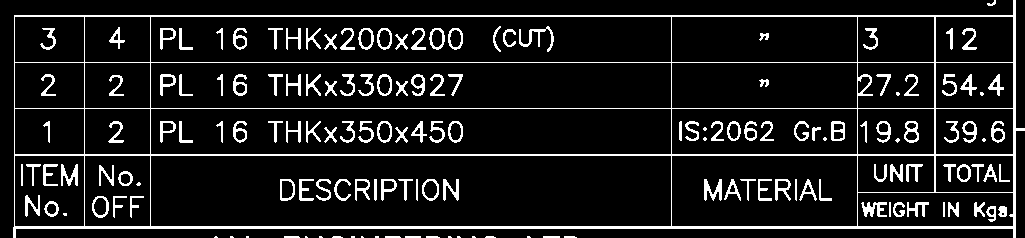

In [3]:
# 17/6/2021

x = cv2.imread(drg_image[3], cv2.IMREAD_GRAYSCALE)

y = x[1648:1648+238, 2284:2284+1025]
yy = y[85:100,73:86]
x_pil = Image.fromarray(yy)
display(x_pil)

ret,thresh_4 = cv2.threshold(y,50,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((2,2),np.uint8)
y_eros = cv2.erode(thresh_4,kernel,iterations = 1)
x_pil = Image.fromarray(y_eros)
display(x_pil)


#{"name":"rect","x":2284,"y":1648,"width":1025,"height":238}


(20, 1, 4)
20


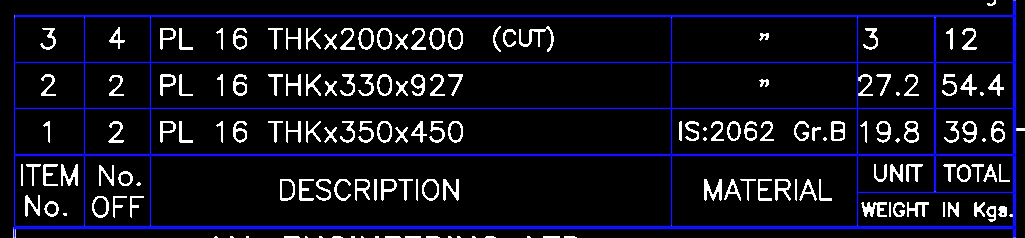

In [155]:
# Copy edges to the images that will display the results in BGR

cdstP_new = cv2.cvtColor(y_eros, cv2.COLOR_GRAY2BGR)

linesP = cv2.HoughLinesP(y_eros, 1, np.pi / 180, 50, None, 150, 5)

print(linesP.shape)
"""
i = 1
print(linesP[i])

l = linesP[i][0]
cv2.line(cdstP_new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
"""

if linesP is not None:
    for i in range(0, len(linesP)):
        l = linesP[i][0]
        cv2.line(cdstP_new, (l[0], l[1]), (l[2], l[3]), (0,0,255), 1, cv2.LINE_AA)

print(len(linesP))
x_pil = Image.fromarray(cdstP_new) 
display(x_pil)


In [3]:
print(drg_image[100].split('/')[-1]) # {"name":"rect","x":1973,"y":1328,"width":1220,"height":498}

print(drg_image[110].split('/')[-1]) # {"name":"rect","x":2098,"y":1458,"width":1047,"height":359}

print(drg_image[120].split('/')[-1]) # {"name":"rect","x":2414,"y":1588,"width":757,"height":372}

print(drg_image[130].split('/')[-1]) # {"name":"rect","x":2220,"y":1683,"width":930,"height":134}

print(drg_image[140].split('/')[-1]) # {"name":"rect","x":2280,"y":1687,"width":922,"height":138}



1061.jpg
1071.jpg
1081.jpg
1091.jpg
1101.jpg


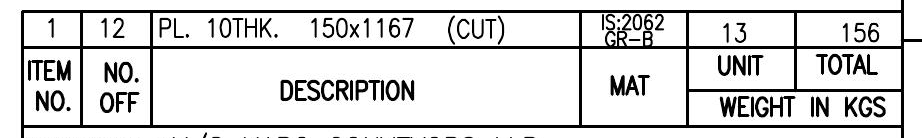

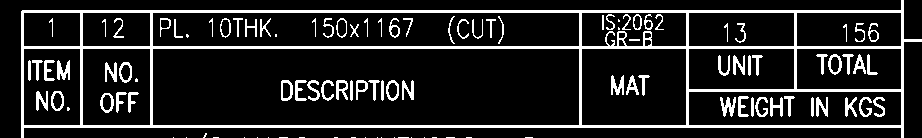

In [55]:
x = cv2.imread(drg_image[140], cv2.IMREAD_GRAYSCALE)
y = x[1687:1687+138, 2280:2280+922]
yy = y[85:100,73:86]
x_pil = Image.fromarray(y)
display(x_pil)

ret,thresh_3 = cv2.threshold(y,50,255,cv2.THRESH_BINARY_INV)
#kernel = np.ones((2,2),np.uint8)
#y_erosion = cv2.erode(thresh_3,kernel,iterations = 1)
x_pil = Image.fromarray(thresh_3)
display(x_pil)



(9, 1, 4)
9
7


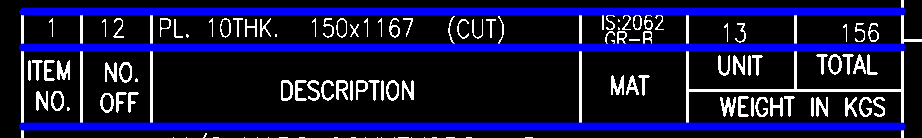

In [56]:
# Copy edges to the images that will display the results in BGR

#cdstP = cv2.cvtColor(y_erosion, cv2.COLOR_GRAY2BGR)

cdstP = cv2.cvtColor(thresh_3, cv2.COLOR_GRAY2BGR)

#linesP_1 = cv2.HoughLinesP(y_erosion, 1, np.pi / 180, 50, None, 150, 5)
#linesP_2 = cv2.HoughLinesP(y_erosion, 2, np.pi / 180, 50, None, 150, 5)

linesP_1 = cv2.HoughLinesP(thresh_3, 1, np.pi / 180, 50, None, 200, 5)
linesP_2 = cv2.HoughLinesP(thresh_3, 2, np.pi / 180, 50, None, 150, 5)

print(linesP_1.shape)

"""
i = 20
print(linesP_1[i])

l = linesP_1[i][0]
cv2.line(cdstP_test, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
"""

if linesP_1 is not None:
    for i in range(0, len(linesP_1)):
        l = linesP_1[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)
        
if linesP_2 is not None:
    for i in range(0, len(linesP_2)):
        l = linesP_2[i][0]
        cv2.line(cdstP, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

print(len(linesP_1))
print(len(linesP_2))

x_pil = Image.fromarray(cdstP) 
display(x_pil)


In [57]:
print(len(linesP_2))
abab = np.concatenate((linesP_1, linesP_2), axis = 0)
len(abab)

7


16

In [58]:
#compare_line_all = linesP_1
#compare_line_sub = linesP_1
compare_line_all = abab
compare_line_sub = abab
aaa = 0
my_list = []

for k in range(len(compare_line_all)-1):

    for i in range(0, len(compare_line_sub)-1):
        diff = np.absolute(compare_line_all[k][0] - compare_line_sub[i+1][0])
        kount = np.count_nonzero(diff <= 5)
        if kount >= 3:
            #print('k = ',k)
            #print(i+1+aaa)
            #print('indexes are = ', k)
            #print('indexes are = ', i+1+aaa)
            #print(compare_line_all[k])
            #print(compare_line_all[i+1+aaa])
            if compare_line_all[k][0][0] == compare_line_all[k][0][2]:
                #print('==============================')
                k_line_length = np.absolute(compare_line_all[k][0][1] - compare_line_all[k][0][3])
                other_line_length = np.absolute(compare_line_all[i+1+aaa][0][1] - compare_line_all[i+1+aaa][0][3])
                if k_line_length >= other_line_length:
                    my_list.append(i+1+aaa)
                else:
                    my_list.append(k)
                    
            if compare_line_all[k][0][1] == compare_line_all[k][0][3]:
                #print('+++++++++++++++++++++++++++++++++++++')
                k_line_length = np.absolute(compare_line_all[k][0][0] - compare_line_all[k][0][2])
                other_line_length = np.absolute(compare_line_all[i+1+aaa][0][0] - compare_line_all[i+1+aaa][0][2])
                if k_line_length >= other_line_length:
                    my_list.append(i+1+aaa)
                else:
                    my_list.append(k)
                
                #print(my_list)
    #        my_list.append(k)
    #print('==========================================')
    compare_line_sub = compare_line_sub[1:]
    aaa = aaa+1
    
drop_list = list(set(my_list))    
print(len(drop_list))
print(drop_list)

13
[2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


In [59]:
#mask = np.ones_like(linesP_1, dtype=bool)
mask = np.ones_like(abab, dtype=bool)
indices = np.array(drop_list)
mask[indices, 0, :] = False
#reqd_num_line = len(linesP_1) - len(drop_list)
reqd_num_line = len(abab) - len(drop_list)
#new_linesP_1 = linesP_1[mask].reshape((reqd_num_line, 1, 4))
#print(len(new_linesP_1))
new_abab = abab[mask].reshape((reqd_num_line, 1, 4))
print(len(new_abab))

3


[[ 21 125 903 125]]
[[ 21  11 903  11]]
[[ 21  47 903  47]]


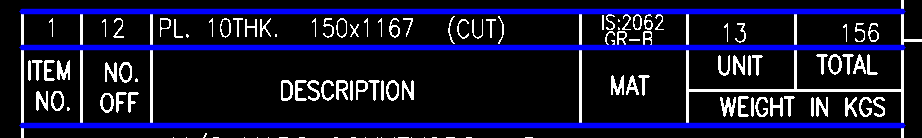

In [60]:
#subr = cv2.cvtColor(y_erosion, cv2.COLOR_GRAY2BGR)
subr = cv2.cvtColor(thresh_3, cv2.COLOR_GRAY2BGR)
"""
i = 14
print(new_abab[i])
#print(new_abab[10])

l = new_abab[i][0]
cv2.line(subr, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)


if new_linesP_1 is not None:
    for i in range(0, len(new_linesP_1)):
        l = new_linesP_1[i][0]
        cv2.line(subr, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)
"""
#print(len(linesP_1))

if new_abab is not None:
    for i in range(0, len(new_abab)):
        l = new_abab[i][0]
        print(new_abab[i])
        cv2.line(subr, (l[0], l[1]), (l[2], l[3]), (0,0,255), 3, cv2.LINE_AA)

x_pil = Image.fromarray(subr) 
display(x_pil)

In [11]:
compare_line_all = linesP
compare_line_sub = linesP
aaa = 0
my_list = []

for k in range(len(compare_line_all)-1):

    for i in range(0, len(compare_line_sub)-1):
        diff = np.absolute(compare_line_all[k][0] - compare_line_sub[i+1][0])
        kount = np.count_nonzero(diff <= 5)
        if kount >= 3:
            
            if compare_line_all[k][0][0] == compare_line_all[k][0][2]:
                #print('==============================')
                k_line_length = np.absolute(compare_line_all[k][0][1] - compare_line_all[k][0][3])
                other_line_length = np.absolute(compare_line_all[i+1+aaa][0][1] - compare_line_all[i+1+aaa][0][3])
                if k_line_length >= other_line_length:
                    my_list.append(k)
                else:
                    my_list.append(i+1+aaa)
                    
            if compare_line_all[k][0][1] == compare_line_all[k][0][3]:
                #print('+++++++++++++++++++++++++++++++++++++')
                k_line_length = np.absolute(compare_line_all[k][0][0] - compare_line_all[k][0][2])
                other_line_length = np.absolute(compare_line_all[i+1+aaa][0][0] - compare_line_all[i+1+aaa][0][2])
                if k_line_length >= other_line_length:
                    my_list.append(i+1+aaa)
                else:
                    my_list.append(k)
                
                #print(my_list)
    #        my_list.append(k)
    #print('==========================================')
    compare_line_sub = compare_line_sub[1:]
    aaa = aaa+1
    
drop_list = list(set(my_list))    
print(len(drop_list))
print(drop_list)

7
[5, 6, 7, 8, 10, 13, 16]


In [13]:
mask = np.ones_like(linesP, dtype=bool)
indices = np.array(drop_list)
mask[indices, 0, :] = False
reqd_num_line = len(linesP) - len(drop_list)
new_linesP = linesP[mask].reshape((reqd_num_line, 1, 4))
print(len(new_linesP))

13


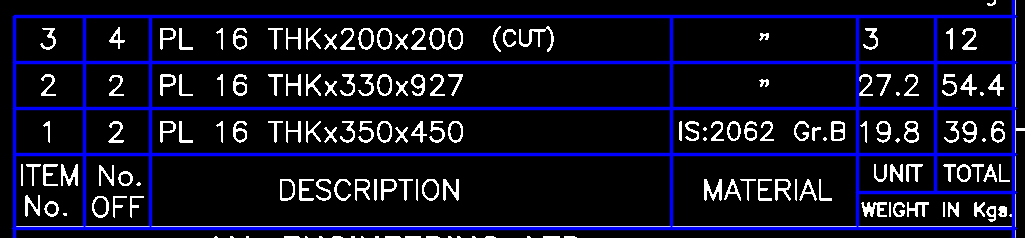

In [14]:
subr = cv2.cvtColor(y_eros, cv2.COLOR_GRAY2BGR)

if new_linesP is not None:
    for i in range(0, len(new_linesP)):
        l = new_linesP[i][0]
        cv2.line(subr, (l[0], l[1]), (l[2], l[3]), (0,0,255), 2, cv2.LINE_AA)

#print(len(linesP_1))

x_pil = Image.fromarray(subr) 
display(x_pil)

In [88]:
co_ors = pd.DataFrame(new_linesP.reshape(new_linesP.shape[0], new_linesP.shape[2]), columns = ['x_1', 'y_1', 'x_2', 'y_2' ])
co_ors_hor = co_ors[co_ors['y_1'] == co_ors['y_2']].reset_index(drop=True)
co_ors_ver = co_ors[co_ors['x_1'] == co_ors['x_2']].reset_index(drop=True)
co_ors_ver = co_ors_ver.sort_values('x_1')
co_ors_hor = co_ors_hor.sort_values('y_1')
compare_val_ver = co_ors_ver.copy()
compare_val_hor = co_ors_hor.copy()

for i in range(len(co_ors_ver)):
    if compare_val_ver['y_1'][i] > compare_val_ver['y_2'][i]:
        co_ors_ver['y_1'] = compare_val_ver['y_2']
        co_ors_ver['y_2'] = compare_val_ver['y_1']
    
for i in range(len(co_ors_hor)):
    if compare_val_hor['x_1'][i] > compare_val_hor['x_2'][i]:
        co_ors_hor['x_1'] = compare_val_hor['x_2']
        co_ors_hor['x_2'] = compare_val_hor['x_1']

co_ors_ver

x_1  y_1   x_2  y_2
5    14   17    14  237
3    84   17    84  225
1   150   17   150  225
0   671   17   671  225
2   857   17   857  225
6   935   17   935  191
4  1013    0  1013  237

In [89]:
co_ors_hor

x_1  y_1   x_2  y_2
4   14   16  1015   16
0   14   62  1015   62
1   14  108  1015  108
3   14  154  1015  154
5  857  192  1015  192
2   13  228  1015  228

In [78]:
co_ors_hor.sort


0    1     2    3
0   14   62  1015   62
1   14  108  1015  108
2   13  228  1015  228
3   14  154  1015  154
4   14   16  1015   16
5  857  192  1015  192

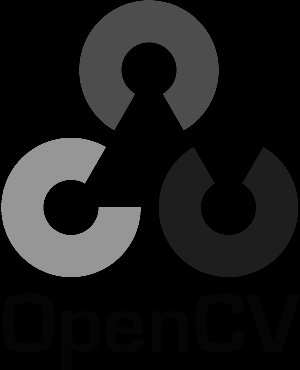

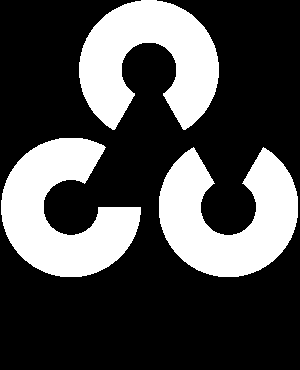

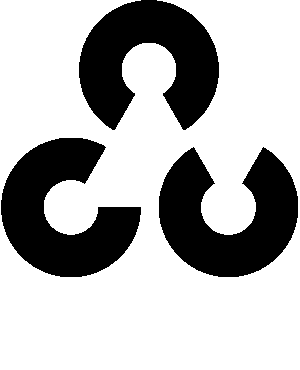

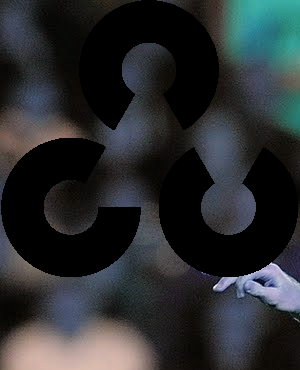

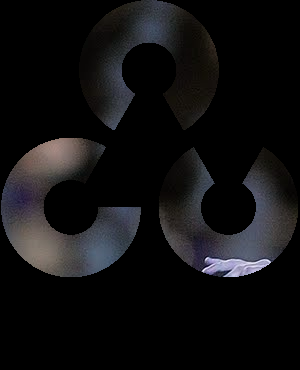

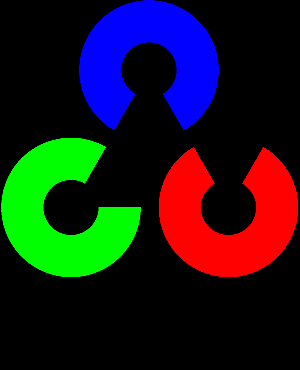

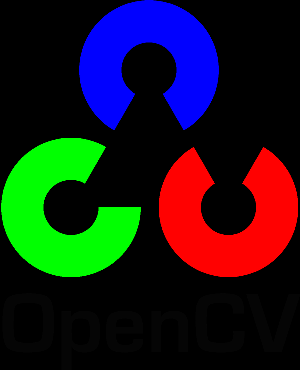

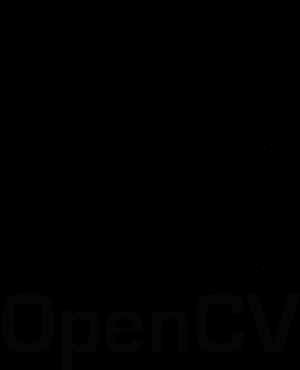

In [50]:
# Load two images
img1 = cv2.imread('C:/Users/rohan/Downloads/messi.jpg')
img2 = cv2.imread('C:/Users/rohan/Downloads/open_cv.png')

small = cv2.resize(img2, (0,0), fx=0.25, fy=0.25)

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = small.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
small_gray = cv2.cvtColor(small,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(small_gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg_1 = cv2.bitwise_and(roi,roi,mask = mask_inv)
img1_bg_2 = cv2.bitwise_and(roi,roi,mask = mask)

# Take only region of logo from logo image.
small_fg_1 = cv2.bitwise_and(small,small,mask = mask)
small_fg_2 = cv2.bitwise_and(small,small,mask = mask_inv)

# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg_1,small_fg_1)


img1[0:rows, 0:cols ] = dst

small_pil = Image.fromarray(small)
small_gray_pil = Image.fromarray(small_gray)
mask_pil = Image.fromarray(mask)
mask_inv_pil = Image.fromarray(mask_inv)
img1_bg_1_pil = Image.fromarray(img1_bg_1)
img1_bg_2_pil = Image.fromarray(img1_bg_2)
small_fg_1_pil = Image.fromarray(small_fg_1)
small_fg_2_pil = Image.fromarray(small_fg_2)
display(small_gray_pil)
display(mask_pil)
display(mask_inv_pil)
display(img1_bg_1_pil)
display(img1_bg_2_pil)
display(small_fg_1_pil)
display(small_pil)
display(small_fg_2_pil)

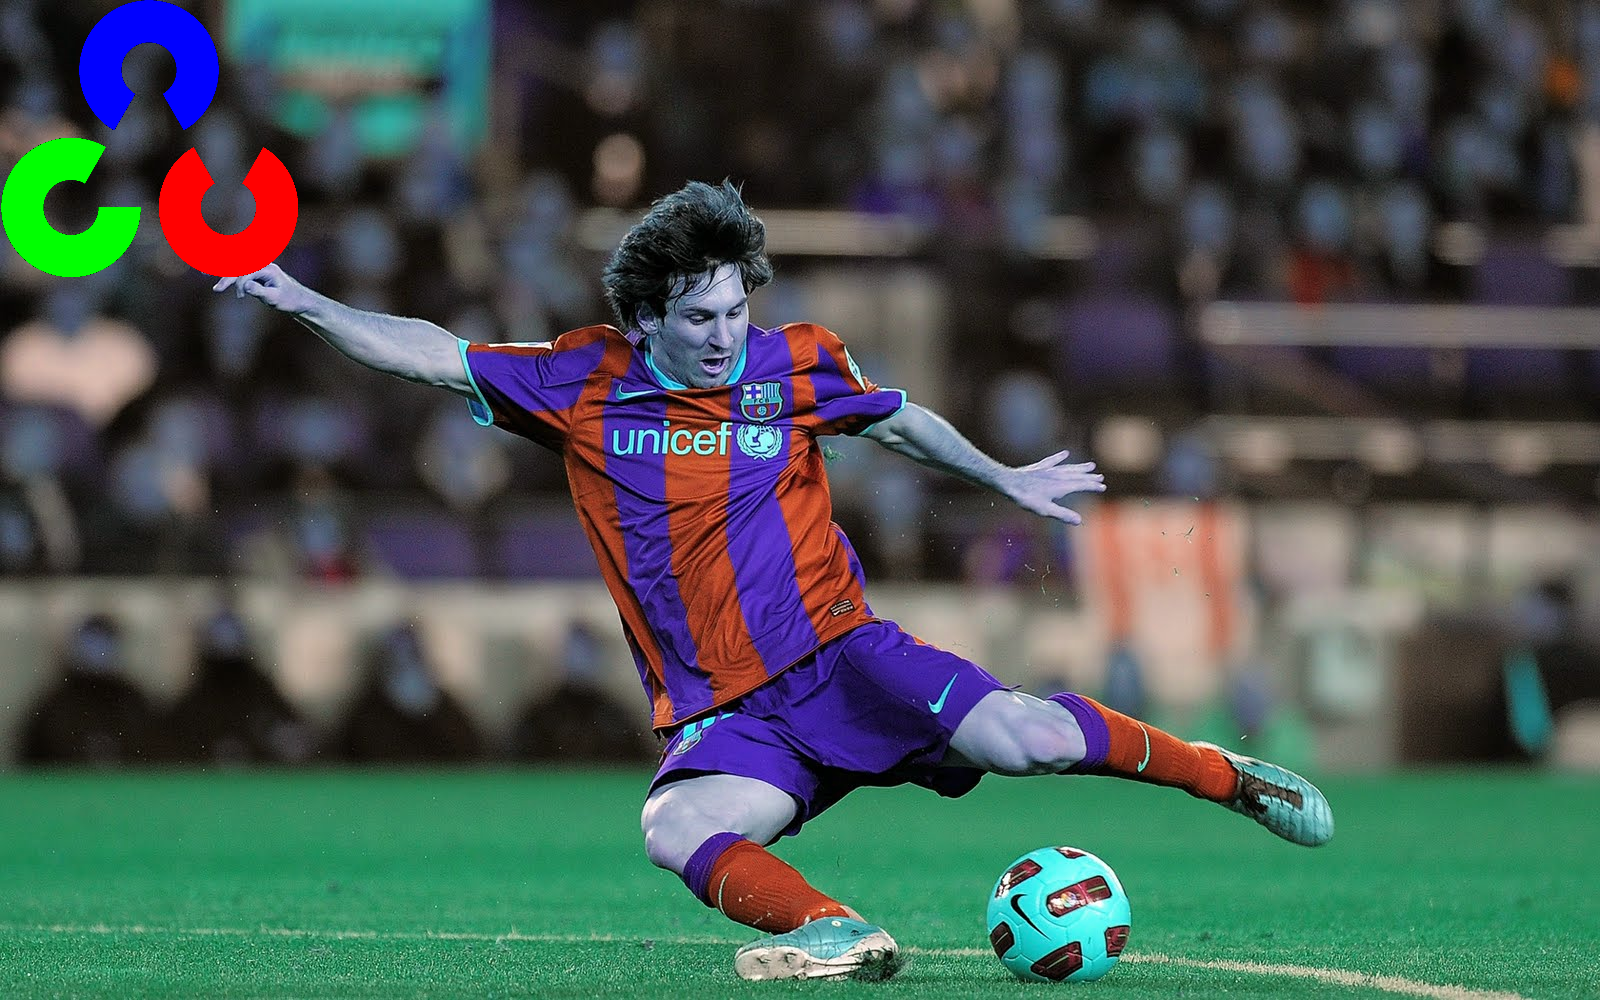

In [10]:

a = img1
a_pil = Image.fromarray(a)
display(a_pil)

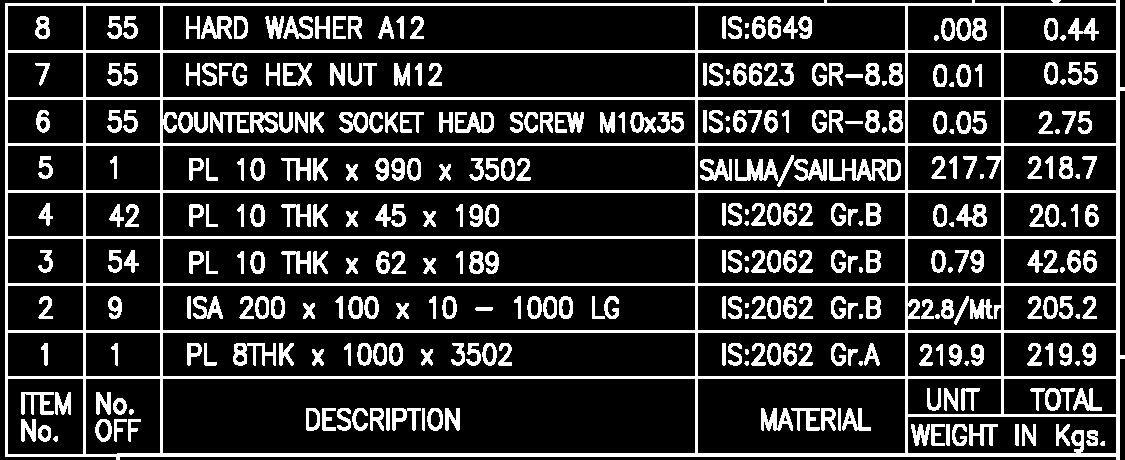

In [105]:
ret,thresh1 = cv2.threshold(y,50,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(y,50,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(y,50,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(y,50,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(y,50,255,cv2.THRESH_TOZERO_INV)
#a = thresh1
a = thresh2
a_pil = Image.fromarray(a)
display(a_pil)

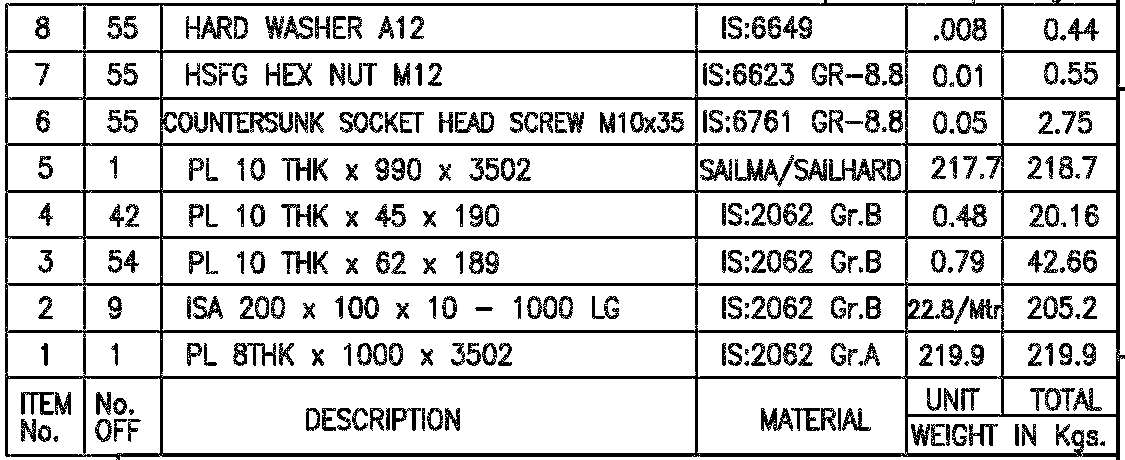

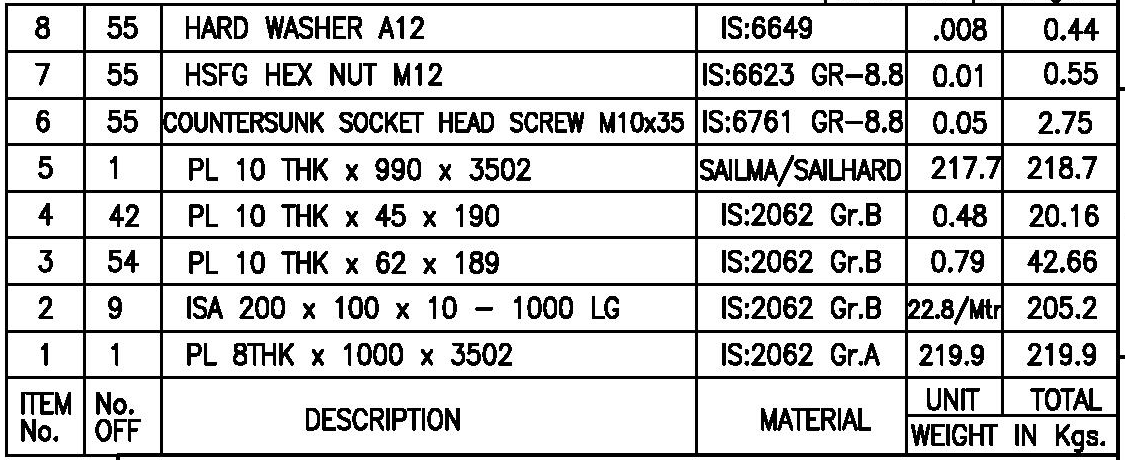

In [48]:
ret,thresh1 = cv2.threshold(y,10,255,cv2.THRESH_BINARY)
a = thresh1
a_pil = Image.fromarray(a)
display(a_pil)
aa = y
aa_pil= Image.fromarray(aa)
display(aa_pil)

In [25]:
ret,thresh1 = cv2.threshold(y,30,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(y,10,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(y,10,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(y,10,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(y,10,255,cv2.THRESH_TOZERO_INV)

In [30]:
reader = easyocr.Reader(['en']) # need to run only once to load model into memory
result = reader.readtext(a)

result_pd = pd.DataFrame(result)
result_pd

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


0                 1  \
0            [[30, 12], [54, 12], [54, 42], [30, 42]]                 8   
1        [[104, 12], [142, 12], [142, 44], [104, 44]]                55   
2        [[184, 12], [430, 12], [430, 44], [184, 44]]  HARD  WASHER A12   
3        [[715, 12], [817, 12], [817, 43], [715, 43]]           IS:6649   
4        [[930, 14], [992, 14], [992, 46], [930, 46]]              .008   
..                                                ...               ...   
74       [[18, 416], [64, 416], [64, 448], [18, 448]]               No.   
75     [[92, 416], [144, 416], [144, 446], [92, 446]]               OFF   
76   [[300, 403], [466, 403], [466, 439], [300, 439]]       DESCRIPTION   
77   [[757, 404], [875, 404], [875, 436], [757, 436]]          MATERIAL   
78  [[907, 419], [1113, 419], [1113, 457], [907, 4...    WEIGHT IN Kgs:   

           2  
0   0.994688  
1   0.999549  
2   0.889763  
3   0.842453  
4   0.911320  
..       ...  
74  0.828799  
75  0.999014  
76  0.992393  
77  0.961556  
78  0.269264  

[79 rows x 3 columns]

In [65]:
result = reader.readtext(a)

result_pd = pd.DataFrame(result)
result_pd.tail(10)

0               1  \
67  [[1023, 337], [1103, 337], [1103, 373], [1023,...           219.9   
68       [[18, 388], [78, 388], [78, 420], [18, 420]]             TEM   
69     [[91, 387], [141, 387], [141, 423], [91, 423]]              No   
70   [[924, 384], [984, 384], [984, 416], [924, 416]]            UNIT   
71  [[1028, 384], [1104, 384], [1104, 416], [1028,...            TOTA   
72       [[18, 416], [64, 416], [64, 448], [18, 448]]             No.   
73     [[92, 416], [144, 416], [144, 446], [92, 446]]             OFF   
74   [[301, 403], [467, 403], [467, 439], [301, 439]]     DESCRIPTION   
75   [[758, 404], [876, 404], [876, 436], [758, 436]]        MATERIAL   
76  [[907, 419], [1113, 419], [1113, 457], [907, 4...  WEIGHT IN Kgs:   

           2  
67  0.999914  
68  0.358254  
69  0.993433  
70  0.875696  
71  0.896019  
72  0.847136  
73  0.999061  
74  0.913360  
75  0.955227  
76  0.317801

In [69]:
a = unsharp_mask(y)
result = reader.readtext(a)

result_pd = pd.DataFrame(result)
result_pd.tail(10)

0               1  \
63  [[1023, 337], [1103, 337], [1103, 373], [1023,...           219.9   
64       [[18, 388], [78, 388], [78, 420], [18, 420]]             TEM   
65     [[91, 387], [141, 387], [141, 423], [91, 423]]              No   
66   [[924, 384], [984, 384], [984, 416], [924, 416]]            UNIT   
67  [[1028, 384], [1104, 384], [1104, 416], [1028,...            TOTA   
68       [[18, 416], [64, 416], [64, 448], [18, 448]]             No.   
69     [[92, 416], [144, 416], [144, 446], [92, 446]]             OFF   
70   [[301, 403], [467, 403], [467, 439], [301, 439]]     DESCRIPTION   
71   [[758, 404], [876, 404], [876, 436], [758, 436]]        MATERIAL   
72  [[907, 419], [1113, 419], [1113, 457], [907, 4...  WEIGHT IN Kgs:   

           2  
63  0.999878  
64  0.284563  
65  0.993906  
66  0.863533  
67  0.911711  
68  0.871143  
69  0.999103  
70  0.687785  
71  0.960696  
72  0.193347

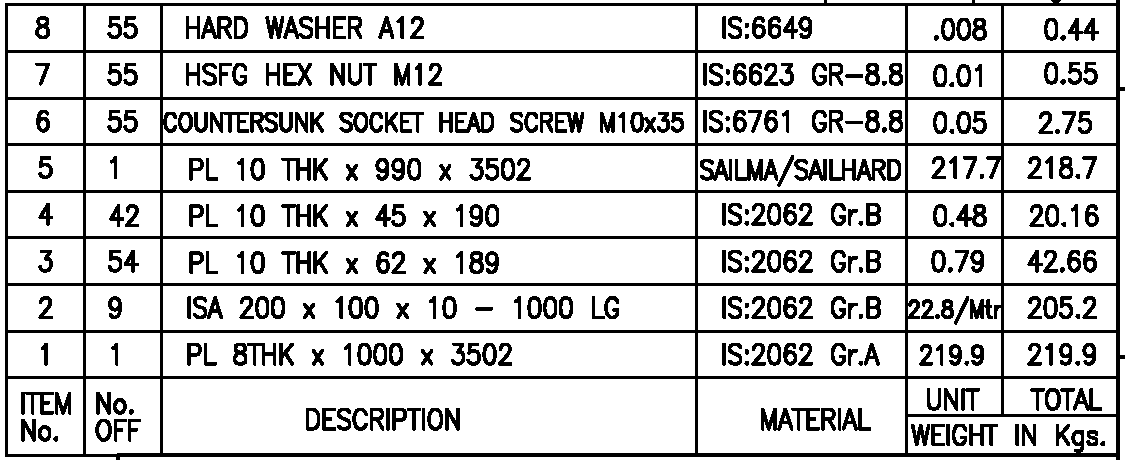

0               1  \
69  [[1023, 337], [1103, 337], [1103, 373], [1023,...           219.9   
70       [[18, 388], [78, 388], [78, 420], [18, 420]]             TEM   
71     [[92, 388], [138, 388], [138, 418], [92, 418]]             No.   
72   [[924, 384], [984, 384], [984, 416], [924, 416]]            UNIT   
73  [[1028, 384], [1104, 384], [1104, 416], [1028,...            TOTA   
74       [[18, 416], [64, 416], [64, 448], [18, 448]]             No.   
75     [[92, 416], [144, 416], [144, 446], [92, 446]]             OFF   
76   [[300, 403], [466, 403], [466, 439], [300, 439]]     DESCRIPTION   
77   [[757, 404], [875, 404], [875, 436], [757, 436]]        MATERIAL   
78  [[907, 419], [1113, 419], [1113, 457], [907, 4...  WEIGHT IN Kgs:   

           2  
69  0.999868  
70  0.330196  
71  0.546230  
72  0.870714  
73  0.908048  
74  0.828799  
75  0.999014  
76  0.992393  
77  0.961556  
78  0.269264

In [100]:
img1 = cv2.imread(drg_image[1], 0)
y = img1[1420:1880, 2180:3305]
#blur = cv2.GaussianBlur(y,(5,5),0)
ret3,th3 = cv2.threshold(y,50,255, (cv2.THRESH_BINARY + cv2.THRESH_OTSU))
a = th3
a_pil = Image.fromarray(a)
display(a_pil)

result = reader.readtext(a)

result_pd = pd.DataFrame(result)
result_pd.tail(10)


In [84]:
result_pd.tail(10)

0               1  \
70  [[1023, 337], [1103, 337], [1103, 373], [1023,...           219.9   
71       [[20, 388], [76, 388], [76, 420], [20, 420]]               M   
72     [[93, 387], [141, 387], [141, 423], [93, 423]]              No   
73   [[926, 384], [984, 384], [984, 416], [926, 416]]            UNTT   
74  [[1028, 384], [1104, 384], [1104, 416], [1028,...            TOTA   
75       [[18, 416], [64, 416], [64, 448], [18, 448]]             No.   
76     [[92, 416], [144, 416], [144, 446], [92, 446]]             OFF   
77   [[302, 403], [466, 403], [466, 439], [302, 439]]     DESCRIPTION   
78   [[760, 404], [876, 404], [876, 436], [760, 436]]        MATBRIAL   
79  [[907, 419], [1113, 419], [1113, 455], [907, 4...  WEGHT _IN_Kog:   

           2  
70  0.999931  
71  0.991099  
72  0.991862  
73  0.423252  
74  0.535266  
75  0.667312  
76  0.997796  
77  0.752035  
78  0.297378  
79  0.231461